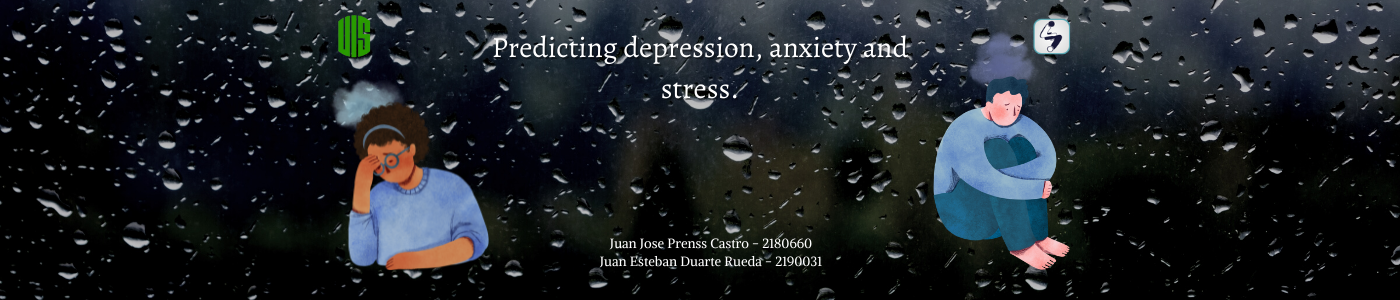

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "/ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ai-uis-student


In [ ]:
#@title Cargue de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__
from sklearn.model_selection import KFold
from sklearn.metrics import *


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras

In [ ]:
#@title Lectura del dataset "Predicting Depression, Anxiety and Stress"
data = pd.read_csv("/content/drive/MyDrive/proyecto/data.csv")
data.head(5)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


# Preprocesamiento de datos.
En esta sección se analizara el dataset completamente para determinar cuales son las caracteristicas (columnas) a tener en cuenta durante el procesamiento del proyecto. Además se cambiaran los 

In [ ]:
# Se eliminaran las columnas que corresponde al tiempo de respuesta de cada pregunta y, a la posición de la misma dentro de la encuesta.
for i in range(1,43):
  del data["Q" + str(i) + "I"]
  del data["Q" + str(i) + "E"]

# Se eliminaran las columnas de control de conocimientos previos.

for i in range(1,17):
  del data["VCL" + str(i)]

#Se eliminaras columnas sueltas que no resultan importantes para los fines de este proyecto.

del data["engnat"] #Ingles es la lengua nativa. 
del data["hand"] #Mano con la que escribe
del data["voted"] #Si voto en las elecciones nacionales pasadas
del data["screensize"] #Tamaño de la pantalla en donde respondio la encuesta
del data["uniquenetworklocation"] #Si en la red se registraron más de una respuesta a la encuesta
del data["source"] #Fuente por la cual se entero de la encuesta

#Se eliminan estas columnas que calculan el tiempo en lectura de pagina inicial, preguntas DASS y preguntas personales y demograficas.
del data["introelapse"]
del data["testelapse"]
del data["surveyelapse"]

#Se elimina la columna de empleo (major).
del data["major"]

In [ ]:
#@title Justificación eliminación columna "Major".
# Se procesaron los datos de profesión para sacarle provecho en las conclusiones. Sin embargo, existen datos ingresados con mala ortografia y respuesta abierto. 
# Es por esto, que se decidio eliminar la columna major.
# data["major"] = data["major"].str.upper()
# uniqueMajor = data["major"].unique()
# # data.head()
# for major in uniqueMajor:
#   print(major)
  

In [ ]:
#Se imprime el dataset con la eliminación de columnas ya realizado. Obteniendo una reducción de datos irrelevantes de aproximadamente el 65%
print(data.shape)
data.head(10)

(39775, 62)


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,TIPI10,education,urban,gender,age,religion,orientation,race,married,familysize
0,4,4,2,4,4,4,4,4,2,1,...,1,2,3,2,16,12,1,10,1,2
1,4,1,2,3,4,4,3,4,3,2,...,5,2,3,2,16,7,0,70,1,4
2,3,1,4,1,4,3,1,3,2,4,...,2,2,3,2,17,4,3,60,1,3
3,2,3,2,1,3,3,4,2,3,3,...,1,1,3,2,13,4,5,70,1,5
4,2,2,3,4,4,2,4,4,4,3,...,3,3,2,2,19,10,1,10,1,4
5,1,1,2,1,3,1,1,3,3,2,...,7,2,3,2,20,4,1,70,1,4
6,1,1,2,3,4,1,3,3,3,4,...,5,2,3,2,17,7,2,60,1,4
7,1,1,1,1,3,2,2,1,1,1,...,2,4,2,2,29,2,2,60,1,2
8,4,4,3,4,3,4,4,4,4,3,...,4,2,3,1,16,12,2,70,1,4
9,3,2,4,1,4,4,3,4,4,4,...,7,1,1,2,18,2,2,60,1,3


In [ ]:
#@title Preprocesamiento datos String de paises.

#Se reemplazan los datos nan por codigo de pais 0
data["country"] = data["country"].fillna(0)
data["country"] = data["country"].replace("NONE", 0)
#Se encuentran los valores unicos de paises para posteriormente reemplazarlos
uniqueCountry = data["country"].unique()
print(uniqueCountry)
cont = 0
for country in uniqueCountry:
  cont = cont + 1
  #Se reemplazan los valores a partir de un codigo obtenido por un contador.
  data["country"] = data["country"].replace(country, cont)
data.head()
aux = data["country"].unique()
print(aux)

['IN' 'US' 'PL' 'MY' 'MX' 'GB' 'DE' 'EE' 'CA' 'EC' 'AU' 'FI' 'ID' 'AE' 0
 'ES' 'NI' 'DO' 'TR' 'NO' 'GR' 'LK' 'BR' 'AR' 'KH' 'IT' 'MK' 'PT' 'BA'
 'RU' 'HU' 'KR' 'IE' 'RS' 'CZ' 'PH' 'RO' 'FR' 'SG' 'AT' 'UA' 'KW' 'CO'
 'GE' 'SE' 'HK' 'NZ' 'ZA' 'NL' 'DK' 'JM' 'LB' 'CL' 'AW' 'IL' 'GT' 'PE'
 'PK' 'NP' 'HR' 'CR' 'VE' 'BG' 'GH' 'MA' 'PR' 'SI' 'LV' 'AL' 'VN' 'GU'
 'BD' 'TH' 'NG' 'FO' 'UY' 'EG' 'BE' 'SA' 'SV' 'CH' 'PY' 'SK' 'SY' 'TN'
 'TT' 'SR' 'KE' 'BY' 'PA' 'CY' 'BW' 'MZ' 'BB' 'GG' 'CW' 'IS' 'IR' 'BN'
 'MV' 'OM' 'DZ' 'JP' 'MU' 'IQ' 'BO' 'MD' 'CN' 'LT' 'BZ' 'BH' 'ME' 'QA'
 'TW' 'PS' 'JO' 'SD' 'KY' 'AZ' 'AO' 'BS' 'GY' 'MO' 'TZ' 'IM' 'AF' 'AM'
 'UZ' 'LU' 'ET' 'JE' 'VU' 'TJ' 'KZ' 'XK' 'HN' 'ZW' 'LA' 'MT' 'SN' 'MN'
 'TG' 'SC' 'RE' 'VC']
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  6

In [ ]:
#@title Dataset con los datos ya preprocesados
data.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,TIPI10,education,urban,gender,age,religion,orientation,race,married,familysize
0,4,4,2,4,4,4,4,4,2,1,...,1,2,3,2,16,12,1,10,1,2
1,4,1,2,3,4,4,3,4,3,2,...,5,2,3,2,16,7,0,70,1,4
2,3,1,4,1,4,3,1,3,2,4,...,2,2,3,2,17,4,3,60,1,3
3,2,3,2,1,3,3,4,2,3,3,...,1,1,3,2,13,4,5,70,1,5
4,2,2,3,4,4,2,4,4,4,3,...,3,3,2,2,19,10,1,10,1,4


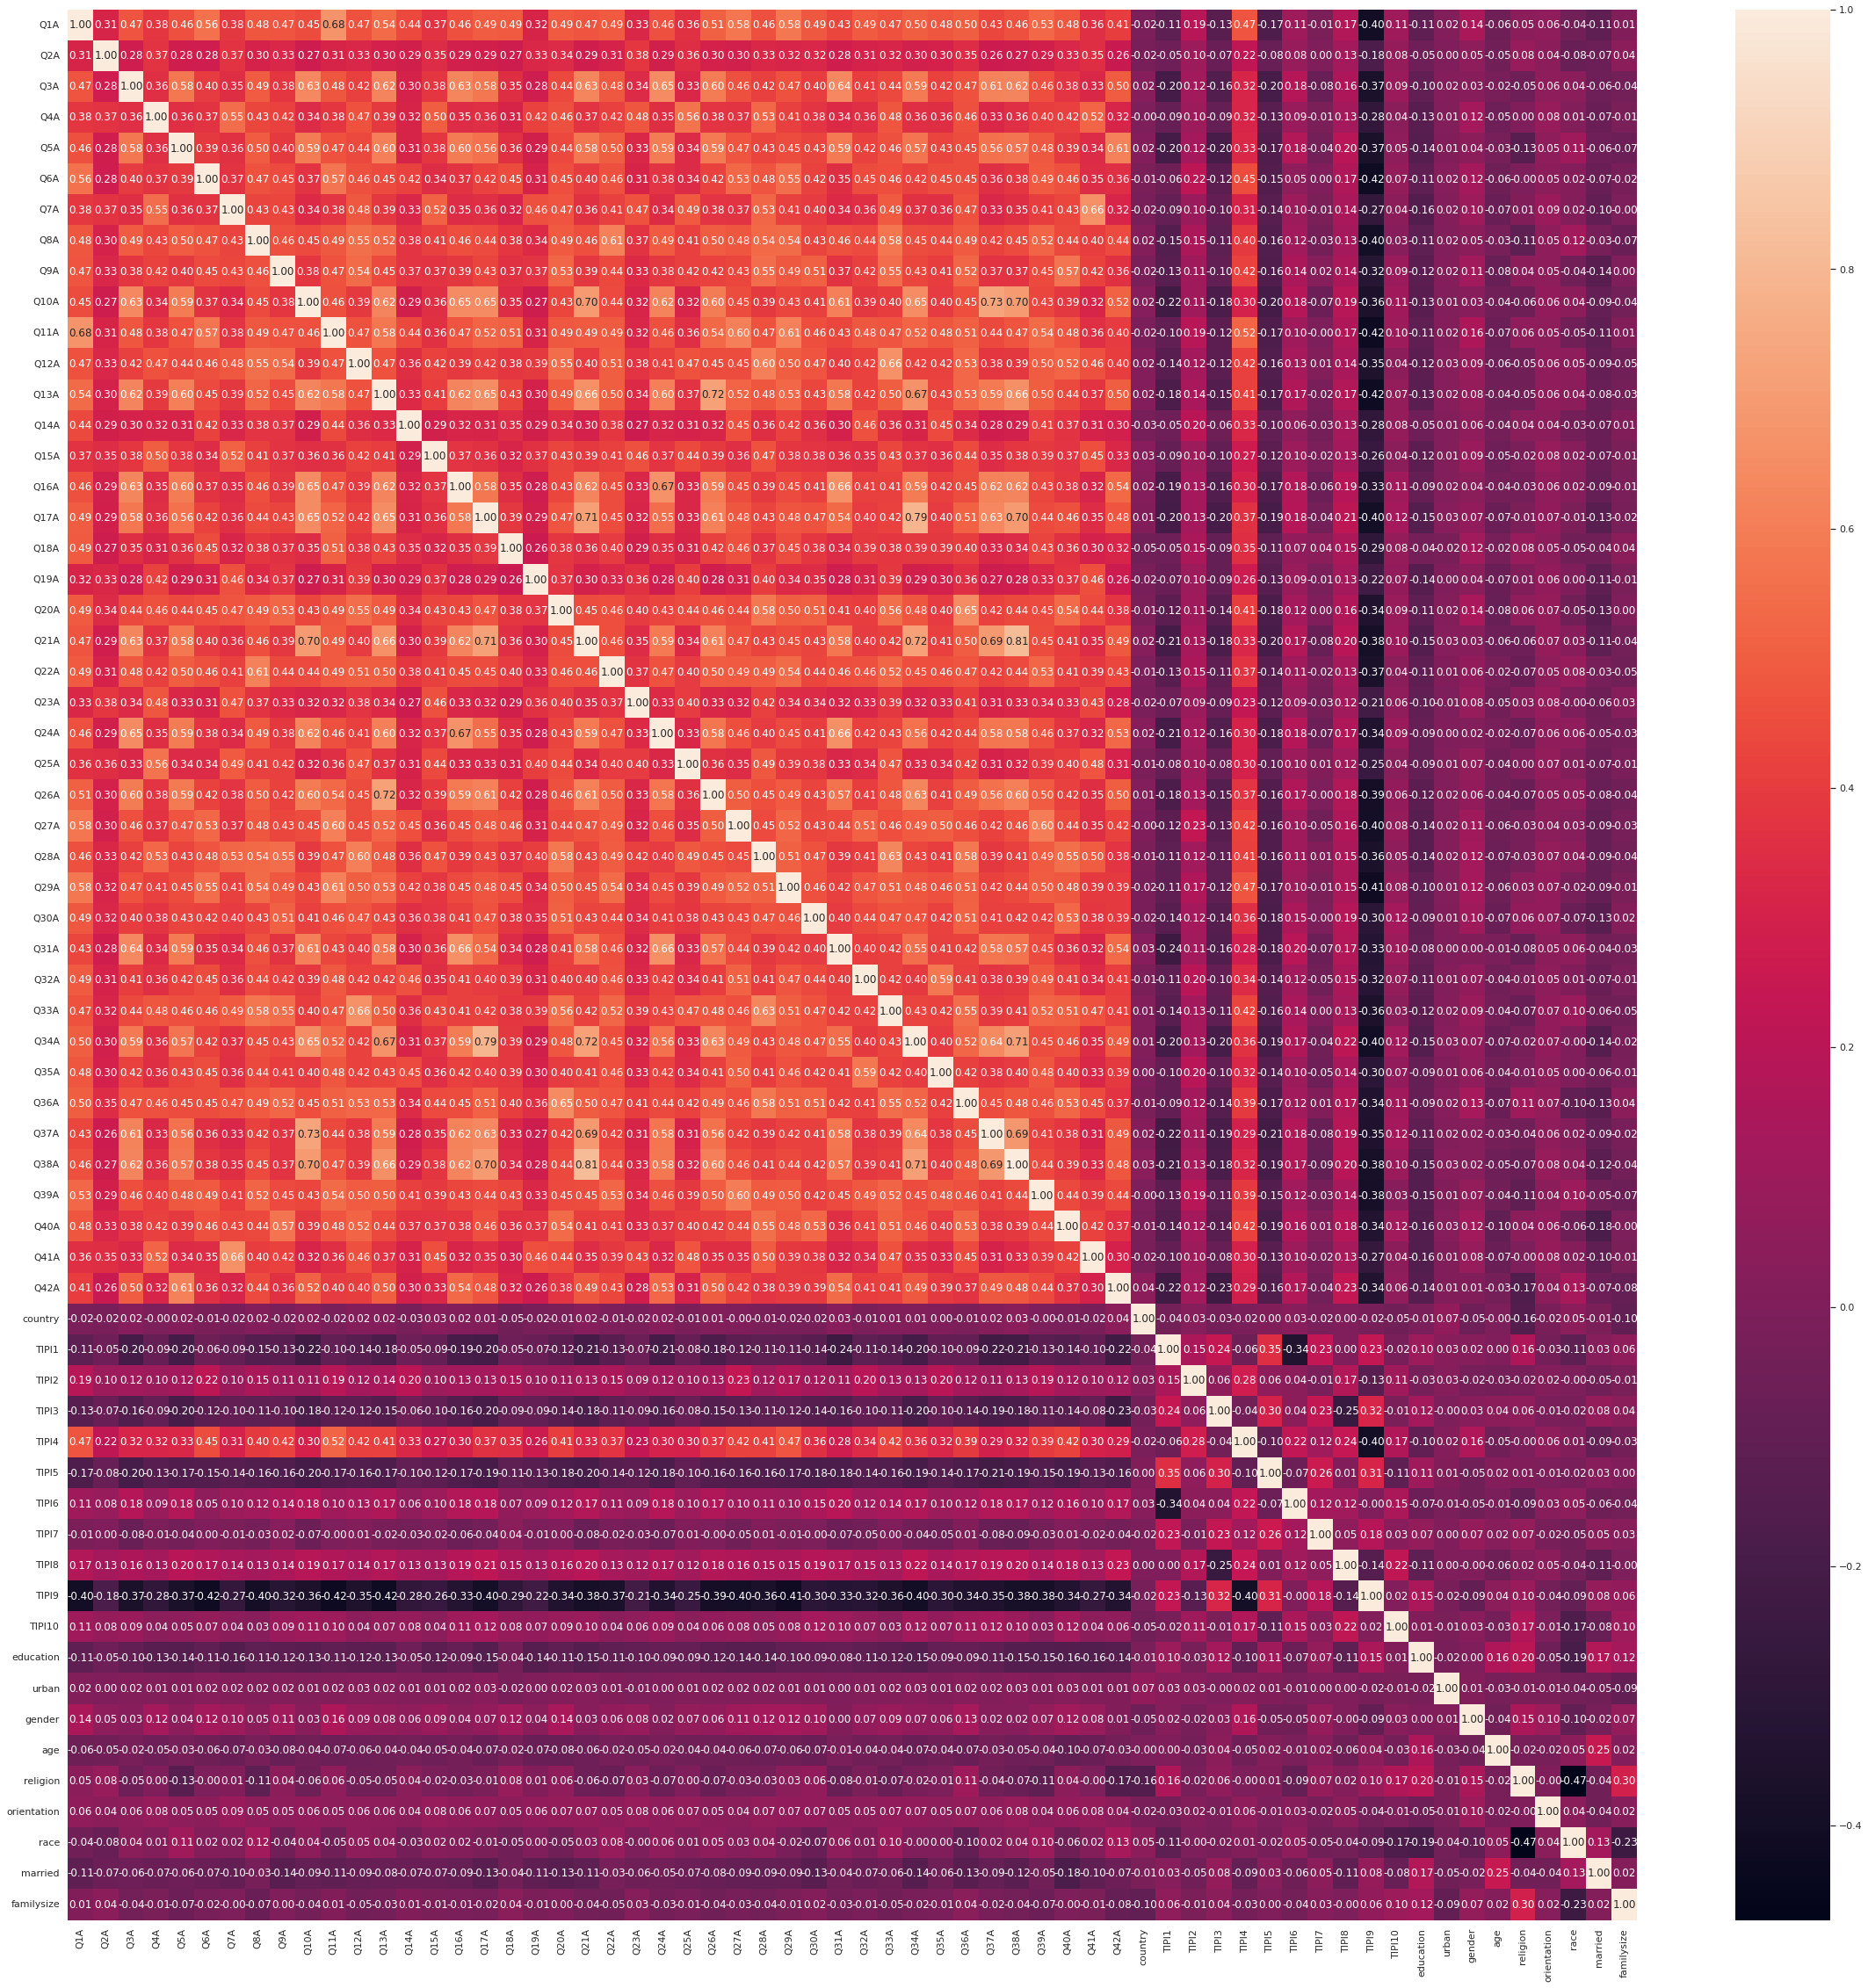

In [ ]:
#@title Mapa de calor
plt.subplots(figsize=(40,40)) #Importante para que se vean todas las correlaciones
sns.heatmap(data.corr(), annot=True, fmt=".2f")

In [ ]:
#@title Particionamiento de los datos

#Datas para la regresión
X_temp = data[['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A',
       'Q10A', 'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A',
       'Q18A', 'Q19A', 'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A',
       'Q26A', 'Q27A', 'Q28A', 'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A',
       'Q34A', 'Q35A', 'Q36A', 'Q37A', 'Q38A', 'Q39A', 'Q40A', 'Q41A',
       'Q42A', 'country', 'education', 'urban',
       'gender', 'age', 'religion', 'orientation', 'race', 'married',
       'familysize']].to_numpy()

#groundtruth
y_count1 = data['TIPI1'].to_numpy()
y_count2 = data['TIPI2'].to_numpy()
y_count3 = data['TIPI3'].to_numpy()
y_count4 = data['TIPI4'].to_numpy()
y_count5 = data['TIPI5'].to_numpy()
y_count6 = data['TIPI6'].to_numpy()
y_count7 = data['TIPI7'].to_numpy()
y_count8 = data['TIPI8'].to_numpy()
y_count9 = data['TIPI9'].to_numpy()
y_count10 = data['TIPI10'].to_numpy()

#particionamiento de los datos 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_temp, y_count1, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_temp, y_count2, test_size=0.2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_temp, y_count3, test_size=0.2)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_temp, y_count4, test_size=0.2)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_temp, y_count5, test_size=0.2)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_temp, y_count6, test_size=0.2)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_temp, y_count7, test_size=0.2)
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_temp, y_count8, test_size=0.2)
X_train9, X_test9, y_train9, y_test9 = train_test_split(X_temp, y_count9, test_size=0.2)
X_train10, X_test10, y_train10, y_test10 = train_test_split(X_temp, y_count10, test_size=0.2)

#Entrenamiento

In [ ]:
#@title Entrenamiento Decision Tree 

##
DT1 = DecisionTreeClassifier(max_depth=5)
DT2 = DecisionTreeClassifier(max_depth=5)
DT3 = DecisionTreeClassifier(max_depth=5)
DT4 = DecisionTreeClassifier(max_depth=5)
DT5 = DecisionTreeClassifier(max_depth=5)
DT6 = DecisionTreeClassifier(max_depth=5)
DT7 = DecisionTreeClassifier(max_depth=5)
DT8 = DecisionTreeClassifier(max_depth=5)
DT9 = DecisionTreeClassifier(max_depth=5)
DT10 = DecisionTreeClassifier(max_depth=5)

####
DT1.fit(X_train1, y_train1)
DT2.fit(X_train2, y_train2)
DT3.fit(X_train3, y_train3)
DT4.fit(X_train4, y_train4)
DT5.fit(X_train5, y_train5)
DT6.fit(X_train6, y_train6)
DT7.fit(X_train7, y_train7)
DT8.fit(X_train8, y_train8)
DT9.fit(X_train9, y_train9)
DT10.fit(X_train10, y_train10)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#@title Entrenamiento Random Forest
##
RF1 = RandomForestClassifier(max_depth=5, n_estimators=100)
RF2 = RandomForestClassifier(max_depth=5, n_estimators=150)
RF3 = RandomForestClassifier(max_depth=5, n_estimators=100)
RF4 = RandomForestClassifier(max_depth=5, n_estimators=100)
RF5 = RandomForestClassifier(max_depth=5, n_estimators=100)
RF6 = RandomForestClassifier(max_depth=5, n_estimators=100)
RF7 = RandomForestClassifier(max_depth=5, n_estimators=100)
RF8 = RandomForestClassifier(max_depth=5, n_estimators=100)
RF9 = RandomForestClassifier(max_depth=5, n_estimators=100)
RF10 = RandomForestClassifier(max_depth=5, n_estimators=100)

####
RF1.fit(X_train1, y_train1)
RF2.fit(X_train2, y_train2)
RF3.fit(X_train3, y_train3)
RF4.fit(X_train4, y_train4)
RF5.fit(X_train5, y_train5)
RF6.fit(X_train6, y_train6)
RF7.fit(X_train7, y_train7)
RF8.fit(X_train8, y_train8)
RF9.fit(X_train9, y_train9)
RF10.fit(X_train10, y_train10)

RandomForestClassifier(max_depth=5)

In [ ]:
#@title Support vector machine
##
SV1 = SVC(C=1, kernel="rbf")
SV2 = SVC(C=1, kernel="rbf")
SV3 = SVC(C=1, kernel="rbf")
SV4 = SVC(C=1, kernel="rbf")
SV5 = SVC(C=1, kernel="rbf")
SV6 = SVC(C=1, kernel="rbf")
SV7 = SVC(C=1, kernel="rbf")
SV8 = SVC(C=1, kernel="rbf")
SV9 = SVC(C=1, kernel="rbf")
SV10 = SVC(C=1, kernel="rbf")

####
SV1.fit(X_train1, y_train1)
SV2.fit(X_train2, y_train2)
SV3.fit(X_train3, y_train3)
SV4.fit(X_train4, y_train4)
SV5.fit(X_train5, y_train5)
SV6.fit(X_train6, y_train6)
SV7.fit(X_train7, y_train7)
SV8.fit(X_train8, y_train8)
SV9.fit(X_train9, y_train9)
SV10.fit(X_train10, y_train10)

SVC(C=1)

In [ ]:
#@title Red Neuronal
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train1[0].shape),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.tanh),
    tf.keras.layers.Dense(16, activation=tf.nn.tanh),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)
])

model1.compile(optimizer=tf.keras.optimizers.SGD(),  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train1, y_train1, epochs=20)

##################################
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train2[0].shape),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.tanh),
    tf.keras.layers.Dense(16, activation=tf.nn.tanh),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)
])

model2.compile(optimizer=tf.keras.optimizers.SGD(),  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train2, y_train2, epochs=20)

##################################
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train3[0].shape),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.tanh),
    tf.keras.layers.Dense(16, activation=tf.nn.tanh),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)
])

model3.compile(optimizer=tf.keras.optimizers.SGD(),  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(X_train3, y_train3, epochs=20)

##################################
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train4[0].shape),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.tanh),
    tf.keras.layers.Dense(16, activation=tf.nn.tanh),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)
])

model4.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.fit(X_train4, y_train4, epochs=20)

##################################
model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train5[0].shape),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.tanh),
    tf.keras.layers.Dense(16, activation=tf.nn.tanh),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)
])

model5.compile(optimizer=tf.keras.optimizers.SGD(),   
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5.fit(X_train5, y_train5, epochs=20)

##################################
model6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train6[0].shape),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.tanh),
    tf.keras.layers.Dense(16, activation=tf.nn.tanh),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)
])

model6.compile(optimizer=tf.keras.optimizers.SGD(),   
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model6.fit(X_train6, y_train6, epochs=20)

##################################
model7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train7[0].shape),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.tanh),
    tf.keras.layers.Dense(16, activation=tf.nn.tanh),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)
])

model7.compile(optimizer=tf.keras.optimizers.SGD(),   
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model7.fit(X_train7, y_train7, epochs=20)

##################################
model8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train8[0].shape),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.tanh),
    tf.keras.layers.Dense(16, activation=tf.nn.tanh),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)
])

model8.compile(optimizer=tf.keras.optimizers.SGD(),   
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model8.fit(X_train8, y_train8, epochs=20)

##################################
model9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train9[0].shape),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.tanh),
    tf.keras.layers.Dense(16, activation=tf.nn.tanh),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)
])

model9.compile(optimizer=tf.keras.optimizers.SGD(),   
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model9.fit(X_train9, y_train9, epochs=20)

##################################
model10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train10[0].shape),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.tanh),
    tf.keras.layers.Dense(16, activation=tf.nn.tanh),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)
])

model10.compile(optimizer=tf.keras.optimizers.SGD(),  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model10.fit(X_train10, y_train10, epochs=20)

Epoch 1/20
995/995 [==============================] - 4s 3ms/step - loss: 1.9094 - accuracy: 0.2383
Epoch 2/20
995/995 [==============================] - 3s 3ms/step - loss: 1.8822 - accuracy: 0.2502
Epoch 3/20
995/995 [==============================] - 3s 3ms/step - loss: 1.8756 - accuracy: 0.2566
Epoch 4/20
995/995 [==============================] - 3s 3ms/step - loss: 1.8694 - accuracy: 0.2591
Epoch 5/20
995/995 [==============================] - 3s 3ms/step - loss: 1.8660 - accuracy: 0.2595
Epoch 6/20
995/995 [==============================] - 3s 3ms/step - loss: 1.8620 - accuracy: 0.2593
Epoch 7/20
995/995 [==============================] - 3s 3ms/step - loss: 1.8608 - accuracy: 0.2611
Epoch 8/20
995/995 [==============================] - 3s 3ms/step - loss: 1.8583 - accuracy: 0.2636
Epoch 9/20
995/995 [==============================] - 3s 3ms/step - loss: 1.8564 - accuracy: 0.2622
Epoch 10/20
995/995 [==============================] - 3s 3ms/step - loss: 1.8540 - accuracy: 0.2643

# Metrica

In [ ]:
#@title Metrica Decision Tree
DTaccuracy = []
esti = [DT1, DT2, DT3, DT4, DT5, DT6, DT7, DT8, DT9, DT10]

XS = [X_test1, X_test2, X_test3, X_test4, X_test5, X_test6, X_test7, X_test8, X_test9, X_test10]

YS = [y_test1, y_test2, y_test3, y_test4, y_test5, y_test6, y_test7, y_test8, y_test9, y_test10]


for i in range(10):
#print(esti[i].predict(XS[0]))
  DTaccuracy.append(accuracy_score(esti[i].predict(XS[i]), YS[i]))
#print(X_test1.shape)
#print(XS[1].shape)
print(DTaccuracy)

[0.26423632935260843, 0.264487743557511, 0.26800754242614705, 0.4336895034569453, 0.2544311753614079, 0.2717787554996857, 0.2872407291011942, 0.26059082338152106, 0.26825895663104965, 0.21898177247014455]


In [ ]:
#@title Metrica Random Forest
RFaccuracy = []
esti = [RF1, RF2, RF3, RF4, RF5, RF6, RF7, RF8, RF9, RF10]

XS = [X_test1, X_test2, X_test3, X_test4, X_test5, X_test6, X_test7, X_test8, X_test9, X_test10]

YS = [y_test1, y_test2, y_test3, y_test4, y_test5, y_test6, y_test7, y_test8, y_test9, y_test10]


for i in range(10):
#print(esti[i].predict(XS[0]))
  RFaccuracy.append(accuracy_score(esti[i].predict(XS[i]), YS[i]))
#print(X_test1.shape)
#print(XS[1].shape)
print(RFaccuracy)

[0.276681332495286, 0.27253299811439347, 0.27089880578252673, 0.439220615964802, 0.2556882463859208, 0.27517284726587055, 0.2917661847894406, 0.2623507228158391, 0.2993086109365179, 0.2282840980515399]


In [ ]:
#@title Metrica SVC
SVaccuracy = []
esti = [SV1, SV2, SV3, SV4, SV5, SV6, SV7, SV8, SV9, SV10]

XS = [X_test1, X_test2, X_test3, X_test4, X_test5, X_test6, X_test7, X_test8, X_test9, X_test10]

YS = [y_test1, y_test2, y_test3, y_test4, y_test5, y_test6, y_test7, y_test8, y_test9, y_test10]


for i in range(10):
#print(esti[i].predict(XS[0]))
  SVaccuracy.append(accuracy_score(esti[i].predict(XS[i]), YS[i]))
#print(X_test1.shape)
#print(XS[1].shape)
print(SVaccuracy)

[0.2651162790697674, 0.26272784412319294, 0.26700188560653676, 0.4219987429289755, 0.2571967316153363, 0.27592708988057824, 0.278441231929604, 0.26021370207416716, 0.2907605279698303, 0.2207416719044626]


In [ ]:
#@title Redes neuronales 
RDaccuracy = []
esti = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]

XS = [X_test1, X_test2, X_test3, X_test4, X_test5, X_test6, X_test7, X_test8, X_test9, X_test10]

YS = [y_test1, y_test2, y_test3, y_test4, y_test5, y_test6, y_test7, y_test8, y_test9, y_test10]


for i in range(10):
#print(esti[i].predict(XS[0]))
  test_loss, test_acc = esti[i].evaluate((XS[i]),YS[i])
  RDaccuracy.append(test_acc)
#print(X_test1.shape)
#print(XS[1].shape)
print(RDaccuracy)

249/249 [==============================] - 1s 2ms/step - loss: 1.9177 - accuracy: 0.2148
[0.2670018970966339, 0.2685103714466095, 0.26436203718185425, 0.422124445438385, 0.2536769211292267, 0.27379006147384644, 0.2837209403514862, 0.2617221772670746, 0.2761785089969635, 0.21483343839645386]


In [ ]:
#@title Accuracys

Accuracys  = np.array([DTaccuracy, RFaccuracy, SVaccuracy, RDaccuracy ])

resultados = pd.DataFrame(Accuracys, 
                          columns = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10'],
                          index =   ['Decision Tree', 'Random Forest', 'SVC', 'Red neuronal' ]
                          )

resultados.head(4)

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
Decision Tree,0.264236,0.264488,0.268008,0.433690,0.254431,0.271779,0.287241,0.260591,0.268259,0.218982
Random Forest,0.276681,0.272533,0.270899,0.439221,0.255688,0.275173,0.291766,0.262351,0.299309,0.228284
SVC,0.265116,0.262728,0.267002,0.421999,0.257197,0.275927,0.278441,0.260214,0.290761,0.220742
Red neuronal,0.267002,0.268510,0.264362,0.422124,0.253677,0.273790,0.283721,0.261722,0.276179,0.214833


# conclusiones

In [ ]:
#@title Respuestas de Juan Duarte
JDQ = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1 ,1, 1, 1, 1, 1, 1, 1, 1, 43, 3, 3, 1, 20, 6, 1, 70, 1, 4])
JDA = [6, 2, 6, 1, 3, 4, 4, 2, 6, 2]

predicDTJD = [DT1.predict([JDQ])[0], DT2.predict([JDQ])[0], DT3.predict([JDQ])[0], DT4.predict([JDQ])[0], DT5.predict([JDQ])[0], DT6.predict([JDQ])[0], DT7.predict([JDQ])[0], DT8.predict([JDQ])[0], DT9.predict([JDQ])[0], DT10.predict([JDQ])[0] ]
predicRTJD = [RF1.predict([JDQ])[0], RF2.predict([JDQ])[0], RF3.predict([JDQ])[0], RF4.predict([JDQ])[0], RF5.predict([JDQ])[0], RF6.predict([JDQ])[0], RF7.predict([JDQ])[0], RF8.predict([JDQ])[0], RF9.predict([JDQ])[0], RF10.predict([JDQ])[0] ]
predicSTJD = [SV1.predict([JDQ])[0], SV2.predict([JDQ])[0], SV3.predict([JDQ])[0], SV4.predict([JDQ])[0], SV5.predict([JDQ])[0], SV6.predict([JDQ])[0], SV7.predict([JDQ])[0], SV8.predict([JDQ])[0], SV9.predict([JDQ])[0], SV10.predict([JDQ])[0] ]

### red neuronal
X_testp1 = X_test1
X_testp1[7954] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1 ,1, 1, 1, 1, 1, 1, 1, 1, 43, 3, 3, 1, 20, 6, 1, 70, 1, 4]
predictRN = [np.argmax(model1.predict(X_testp1)[-1]),np.argmax(model2.predict(X_testp1)[-1]) , np.argmax(model3.predict(X_testp1)[-1]), np.argmax(model4.predict(X_testp1)[-1]), np.argmax(model5.predict(X_testp1)[-1]), np.argmax(model6.predict(X_testp1)[-1]), np.argmax(model7.predict(X_testp1)[-1]), np.argmax(model8.predict(X_testp1)[-1]), np.argmax(model9.predict(X_testp1)[-1]), np.argmax(model10.predict(X_testp1)[-1])]


JDC  = np.array([predicDTJD, predicRTJD, predicSTJD, predictRN, JDA])

resultados = pd.DataFrame(JDC, 
                          columns = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10'],
                          index =   ['Decision Tree', 'Random Forest', 'SVC', 'Red neuronal', 'Ground truth' ]
                          )

resultados.head(5)


,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
Decision Tree,6,5,6,1,7,5,6,1,7,1
Random Forest,6,5,6,1,7,5,6,5,7,1
SVC,5,5,6,5,6,6,6,5,6,2
Red neuronal,5,5,6,1,7,5,6,5,7,2
Ground truth,6,2,6,1,3,4,4,2,6,2


In [ ]:
#@title ¿Por qué un accuracy tan bajo?

unique, counts = np.unique(y_train1, return_counts=True)
result1 = np.column_stack((unique, counts)) 
###################################################
unique, counts = np.unique(y_train2, return_counts=True)
result2 = np.column_stack((unique, counts)) 
###################################################
unique, counts = np.unique(y_train3, return_counts=True)
result3 = np.column_stack((unique, counts)) 
###################################################
unique, counts = np.unique(y_train4, return_counts=True)
result4 = np.column_stack((unique, counts)) 
##################################################
unique, counts = np.unique(y_train5, return_counts=True)
result5 = np.column_stack((unique, counts)) 
###################################################
unique, counts = np.unique(y_train6, return_counts=True)
result6 = np.column_stack((unique, counts)) 

###################################################
unique, counts = np.unique(y_train7, return_counts=True)
result7 = np.column_stack((unique, counts)) 

###################################################
unique, counts = np.unique(y_train8, return_counts=True)
result8 = np.column_stack((unique, counts)) 

###################################################
unique, counts = np.unique(y_train9, return_counts=True)
result9 = np.column_stack((unique, counts)) 

###################################################
unique, counts = np.unique(y_train10, return_counts=True)
result10 = np.column_stack((unique, counts)) 

result = np.array([result1[:,1], result2[:,1], result3[:,1], result4[:,1], result5[:,1], result6[:,1], result7[:,1], result8[:,1], result9[:,1], result10[:,1]])

resultados = pd.DataFrame(result, 
                          columns = [0 , 1, 2,3,4,5,6,7],
                          index = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']
                          )

resultados.head(10)


,0,1,2,3,4,5,6,7
TIPI1,386,4979,4482,3744,4698,6664,4843,2024
TIPI2,464,3126,3257,3484,4955,8293,5588,2653
TIPI3,479,1780,2303,3197,3637,7224,8204,4996
TIPI4,372,1631,1975,1957,2172,7052,7666,8995
TIPI5,414,1351,1787,2661,4096,7670,7759,6082
TIPI6,395,2139,2211,2788,3944,6204,6438,7701
TIPI7,493,799,1087,1810,3500,7288,8867,7976
TIPI8,519,3296,3571,3597,3692,7398,5031,4716
TIPI9,343,4354,5092,5527,5485,4972,3971,2076
TIPI10,439,4313,4569,4977,6143,5306,3278,2795


In [ ]:
#@title Obtener y entrenar con las mejores características
features = DT4.feature_importances_
bestfeat = np.argsort(features)[::-1]
print(features)
print(bestfeat)
#data.columns
datos = ['Q11A','Q29A', 'Q6A','Q33A', 'Q28A', 'Q40A', 'Q1A', 'Q9A', 'Q20A', 'Q12A', 'TIPI1', 'TIPI2',
       'TIPI3',  'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']

X_temp3 = data[datos].to_numpy()
X_trainp4, X_testp4, y_trainp4, y_testp4 = train_test_split(X_temp3, y_count4, test_size=0.2)
RFp4 = RandomForestClassifier(max_depth=5, n_estimators=100)
RFp4.fit(X_trainp4, y_trainp4)

accuracy_score(RFp4.predict(X_testp4), y_testp4)

[0.01187457 0.         0.         0.         0.         0.09141288
 0.         0.         0.00727075 0.         0.66825316 0.00233437
 0.         0.         0.         0.         0.         0.
 0.00102014 0.00437928 0.         0.         0.         0.
 0.         0.         0.         0.03505678 0.10443477 0.
 0.         0.         0.05908523 0.         0.         0.
 0.         0.         0.         0.01261366 0.         0.
 0.         0.         0.         0.0022644  0.         0.
 0.         0.         0.         0.        ]
[10 28  5 32 27 39  0  8 19 11 45 18  7 16 20  1  2  3 17  4  9 15 14 13
 12 22  6 21 51 23 38 49 48 47 46 44 43 42 41 40 37 24 36 35 34 33 31 30
 29 26 50 25]


0.45317410433689503

In [ ]:
#@title Obtener y entrenar con las mejores características
X_temp2 = data[['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A',
       'Q10A', 'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A',
       'Q18A', 'Q19A', 'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A',
       'Q26A', 'Q27A', 'Q28A', 'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A',
       'Q34A', 'Q35A', 'Q36A', 'Q37A', 'Q38A', 'Q39A', 'Q40A', 'Q41A',
       'Q42A', 'TIPI1','TIPI3','TIPI2','TIPI5','TIPI6','TIPI7','TIPI8','TIPI9','TIPI10','country', 'education', 'urban',
       ]].to_numpy()

X_trainp, X_testp, y_trainp, y_testp = train_test_split(X_temp2, y_count4, test_size=0.15)
RFp = RandomForestClassifier(max_depth=7)
RFp.fit(X_trainp, y_trainp)
print(accuracy_score(RFp.predict(X_testp), y_testp))

0.45433216021451317


In [ ]:
#@title Obtener y entrenar con las mejores características
features = DT10.feature_importances_
bestfeat = np.argsort(features)[::-1]
print(features)
print(bestfeat)
#data.columns
datos = ['Q37A', 'Q10A', 'Q17A', 'Q16A', 'Q34A', 'Q24A', 'Q29A','Q31A', 'Q22A','TIPI1', 'TIPI2',
       'TIPI3',  'TIPI4','TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9']

X_temp3 = data[datos].to_numpy()
X_trainp4, X_testp4, y_trainp4, y_testp4 = train_test_split(X_temp3, y_count10, test_size=0.2)
RFp4 = RandomForestClassifier(max_depth=5, n_estimators=100)
RFp4.fit(X_trainp4, y_trainp4)

accuracy_score(RFp4.predict(X_testp4), y_testp4)

[0.         0.00659079 0.         0.         0.         0.
 0.         0.         0.         0.03547086 0.         0.01187115
 0.         0.         0.         0.01882305 0.03497628 0.00820684
 0.01051043 0.         0.00771085 0.01458358 0.         0.01823256
 0.         0.         0.01359649 0.         0.01762725 0.
 0.01733418 0.         0.         0.02619822 0.         0.
 0.09795392 0.00790798 0.         0.         0.         0.
 0.         0.         0.00710609 0.         0.04103435 0.08331691
 0.00875754 0.5121907  0.         0.        ]
[49 36 47 46  9 16 33 15 23 28 30 21 26 11 18 48 17 37 20 44  1 14 13 51
 12 10  7  6  5  4  3  2  8 25 19 22 45 43 42 41 40 39 38 35 34 32 31 29
 27 50 24  0]


0.23519798868636077